In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Schreiben Sie ein Programm, wo das Bild (circles1.png) eingelesen und mit matplotlib gezeigt wird.
Segmentieren Sie alle Kreise und speichern Sie die Maske (das Binärbild) ab.
Segmentieren Sie jetzt Kreise, die die gleichen Intensitätswerte haben.
Speichern Ihre Ergebnisse ab. Diese Masken sind jetzt Ihr Gold Standard für Segmentierung.

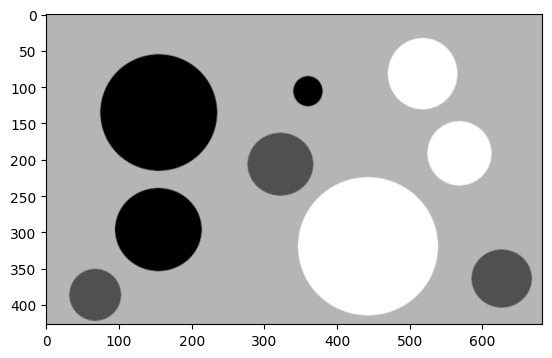

In [13]:
circle1 = cv2.imread('./circles1.png')
circle1 = cv2.cvtColor(circle1, cv2.COLOR_BGR2GRAY)
plt.imshow(circle1, cmap='gray')

True

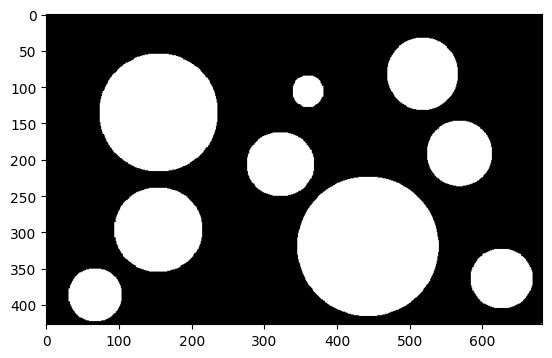

In [19]:
mask_goldstandard = cv2.inRange(circle1, 170, 190)
mask_goldstandard = cv2.bitwise_not(mask_goldstandard)
plt.imshow(mask, cmap='gray')
cv2.imwrite("out/circles1_mask_goldstandard.png", mask_goldstandard)

In [47]:
circles1_unique, circles1_unique_count = np.unique(circle1, return_counts=True)
indicies = np.argsort(circles1_unique_count)
print(circles1_unique_count[indicies][-10:])
print(circles1_unique[indicies][-10:])

[    83     95    134    141    171   1463  14534  31137  40883 197428]
[177 178 179 182 254 180  80   0 255 181]


In [53]:
circle1_mask_black = cv2.inRange(circle1, 0, 10)
circle1_mask_white = cv2.inRange(circle1, 240, 256)
circle1_mask_gray = cv2.inRange(circle1, 78, 82)

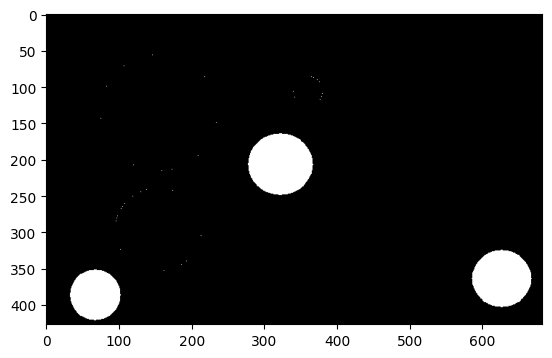

In [54]:
plt.imshow(circle1_mask_gray, cmap='gray')

In [55]:
cv2.imwrite("out/circle1_mask_black.png", circle1_mask_black)
cv2.imwrite("out/circle1_mask_gray.png", circle1_mask_gray)
cv2.imwrite("out/circle1_mask_white.png", circle1_mask_white)


True

Verzerren Sie das Kreise-Bild (circles1.png) mit vier Typen des Rauschens. Für jedes
Rauschen Typ bitte drei Bilder erzeugen (unterschiedliche Rauschenstärke). Für Poisson Noise, bitte, die Funktion in numpy nutzen: https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.poisson.html. Speichern Sie
Ihre Ergebnisse ab.

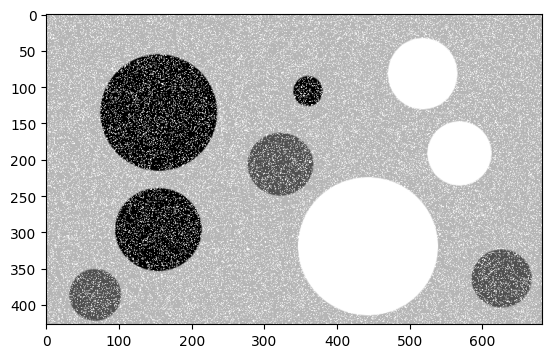

In [51]:
gauss = np.random.normal(0, 1, circle1.size)
gauss = gauss.reshape(circle1.shape[0], circle1.shape[1]).astype('uint8')
circle1_gauss = cv2.add(circle1, gauss)
plt.imshow(circle1_gauss, cmap='gray')

In [ ]:
circle1_saltpepper = circle1.copy()


In [58]:
circle1_poisson = circle1.copy()

for i in range(3):
    poisson = np.random.poisson(1, circle1.size)
    poisson = poisson.reshape(circle1.shape[0], circle1.shape[1]).astype('uint8')
    circle1_poisson = cv2.multiply(circle1_poisson, poisson)
    cv2.imwrite(f"out/circle1_poisson{i}.png", circle1_poisson)


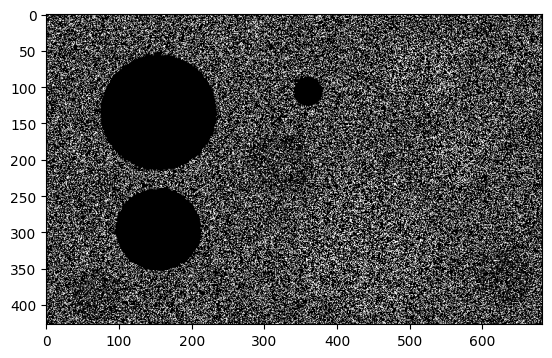

In [59]:
specl = np.random.normal(0, 1, circle1.size)
specl = specl.reshape(circle1.shape[0], circle1.shape[1]).astype('uint8')
circle1_specl = cv2.multiply(circle1, specl)
plt.imshow(circle1_specl, cmap='gray')

Schreiben Sie jetzt ein Programm für die Segmentierung der Kreise. Ihr Algorithmus
soll aus den folgenden Schritten bestehen:
- Bild Einlesen,
- Entrauschen (Averaging, Gaussian Filter, Median Filter),
- Segmentieren (Thresholding),
- Evaluation durchführen, d.h. Metriken (z. B., F1-Score) berechnen.
Testen Sie Ihr Verfahren auf den Bildern (Kreise mit Rauschen). Visualisieren und
quantifizieren Sie Ihre Ergebnisse. Wie gut sind Ihre Ergebnisse? Welche Entrauschen Methode funktioniert am besten? Gilt das für alle Noise types?